(150, 4) (150,)
[-0.9006834  0.8006551 -1.2844061 -1.3129768]
0
(150, 4) (150,)
(60000, 784) (60000,)
[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.      

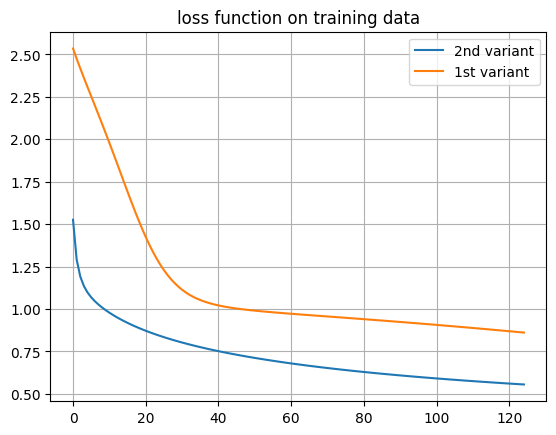

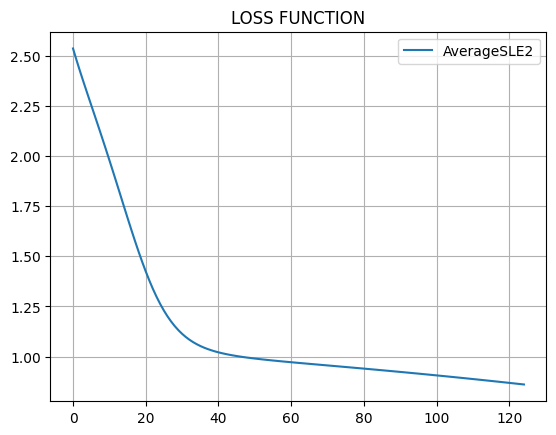

--------------------------++++++++++++++++++++++++++
[0.09331667 0.10728333 0.11976667 0.13218333 0.14521667 0.15786667
 0.17178333 0.18531667 0.19798333 0.21045    0.22328333 0.2364
 0.24945    0.26188333 0.27485    0.2878     0.30101667 0.31348333
 0.32515    0.33866667 0.3514     0.36303333 0.37483333 0.3872
 0.3975     0.4088     0.41923333 0.42986667 0.43955    0.44865
 0.45863333 0.46753333 0.47591667 0.48405    0.4927     0.50083333
 0.50865    0.5168     0.52446667 0.53163333 0.53798333 0.54466667
 0.55105    0.55726667 0.56316667 0.5684     0.57401667 0.57876667
 0.584      0.58891667 0.5943     0.59951667 0.60366667 0.60851667
 0.61268333 0.61703333 0.62078333 0.6244     0.628      0.63165
 0.6353     0.63883333 0.64258333 0.64568333 0.64901667 0.65208333
 0.65498333 0.65775    0.66075    0.66348333 0.66591667 0.6682
 0.67053333 0.67315    0.67553333 0.6779     0.68036667 0.68265
 0.68495    0.68706667 0.68928333 0.6912     0.6934     0.69555
 0.69758333 0.69963333 0.70116667

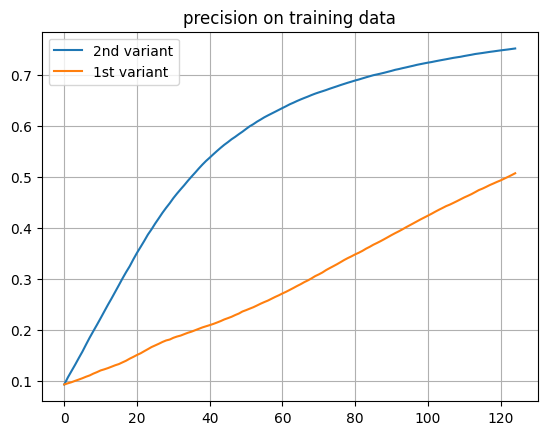

--------------------------++++++++++++++++++++++++++
AllACC1   [\bar Y - Y] 
AllACC2   [Sigmoid(ar Y) - Y] 
MaxSigmoidInput:  2.1643655881275015
MinSigmoidInput:  -15.220040582250764
--------------------------++++++++++++++++++++++++++


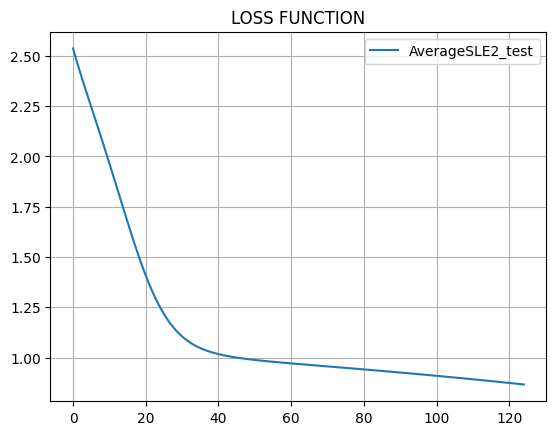

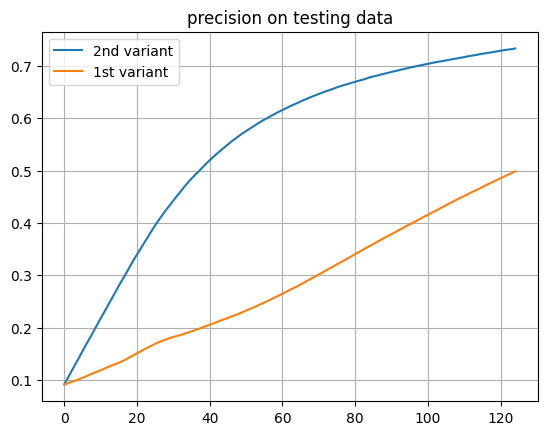

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy.random import randn, normal

import tensorflow as tf
#tf.config.run_functions_eagerly(True)
from tensorflow import keras
import tensorflow_datasets as tfds
from sys import version

# endregion imports
version


x, y = tfds.as_numpy(tfds.load(
    'iris',
    batch_size=-1,
    as_supervised=True,
))["train"]

mean = x.mean(axis=0)
x -= mean
std = x.std(axis=0)
x /= std

print(x.shape, y.shape)
print(x[0]), print(y[0])

from keras.datasets import  mnist, fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,  28*28).astype("float16") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float16") / 255.0

print(x.shape, y.shape)
print(x_train.shape, y_train.shape)
print(x_train[0]), print(y_train[0])
print(x[0]), print(y[0])


x = x_train[:5000]
y = y_train[:5000]


#x = x_train[:]
#y = y_train[:]


data = []
for i in range(len(x)):
  row =  np.insert(x[i], 0, y[i])
  #print(row)
  data.append(row)
print(len(data))


X = data[:]
for rowidx in range( len(X)):
  X[rowidx][0] = 1.0

#y = self.one_hot(y)
Y = []
for rowidx in range( len(y) ):
    row = []
    for colidx in range( len( set(y) ) ):
        if colidx == y[rowidx]:
            row.append( 1 )
        else:
            row.append( 0 )
    Y.append( row )


############################### For TEST ################################
testdata = []
for i in range(len(x_test)):
  row =  np.insert(x_test[i], 0, y_test[i])
  #print(row)
  testdata.append(row)
print(len(testdata))

X_test = testdata[:]
for rowidx in range( len(X_test)):
  X_test[rowidx][0] = 1.0

#y = self.one_hot(y)
Y_test = []
for rowidx in range( len(y_test) ):
    row = []
    for colidx in range( len( set(y_test) ) ):
        if colidx == y_test[rowidx]:
            row.append( 1 )
        else:
            row.append( 0 )
    Y_test.append( row )
############################### For TEST ################################

#print("+++++++++++++++++++++++++++ ! Iris ! +++++++++++++++++++++++++++")
#for rowid in range(len(X)):
#    print(y[rowid], " : ", Y[rowid], " : ", end='')
#    for colid in range(len(X[0])):
#        print("%3.2f  " % data[rowid][colid], end='')
#    print()
#print("Row_Num: ", len(X))
#print("Col_Num: ", len(X[0]))
#print("+++++++++++++++++++++++++++ ! Iris ! +++++++++++++++++++++++++++")
#print(y[-1], " : ", x[-1])



import csv
with open('normalizedMNIST.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)

    for i in range(len(data)):
      spamwriter.writerow(data[i])
csvfile.close()
with open('normalizedMNIST.csv','r') as csvfile:
	reader = csv.reader(csvfile)
	data = []
	for row in reader:
		row = [float(x) for x in row]
		data.append(row)
csvfile.close()


def precision(vec0, vec1):
    if len(vec0) != len(vec1):
        print("Errors in precision()")
        return -1
    totalnum = len(vec0)
    rightnum = 0.0
    for idx in range(totalnum):
        if vec0[idx]  ==  vec1[idx]:
            rightnum += 1
    return rightnum / totalnum

# used for the input range of sigmoid
def testx(inputx):
	#return inputx
	if inputx > 20 :
		return 20
	if inputx < -20 :
		return -20;
	return inputx




# Polynomial Activation Function:
# P_LG[-8, +8] = 0.7974683544 + 0.500000.*x + 0.0563686709.*x.*x;
# P_LG[-6, +6] = 1.1110537229 + 0.500000.*x + 0.054235537.*x.*x;


# Neural Networks Weight Initialization
# https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
# He Weight Initialization for ReLU
# example of the he weight initialization
'''
from math import sqrt
from numpy.random import randn, normal
# number of nodes in the previous layer
n = 10
# calculate the range for the weights
std = sqrt(2.0 / n)
# generate random numbers
numbers = randn(1000)
# scale to the desired range
scaled = numbers * std
# summarize
#print(std)
#print(scaled.min(), scaled.max())
#print(scaled.mean(), scaled.std())
#print(scaled)
'''


###################################### So Begins The HE.NN Training ######################################
# Stage 1. CTX  CTW  CTV
#---------------------------------------------------------------------------------------------------------
#           X  = [ [x11, x12, x13],
#                  [x21, x22, x23],
#                  [x31, x32, x33] ]
#           X  = [ [1, x11, x12, x13],
#                  [1, x21, x22, x23],
#                  [1, x31, x32, x33] ]
#---------------------------------------------------------------------------------------------------------
#           W  = [ [a, b, c][j],
#                  [d, e, f][k],
#                  [g, h, i][l] ]
#           W  = [ [j, a, b, c],
#                  [k, d, e, f],
#                  [l, g, h, i] ]
#---------------------------------------------------------------------------------------------------------
# For Classification：
#           V  = [ [m, n, o][v],
#                  [p, q, r][w] ]
#           V  = [ [v, m, n, o],
#                  [w, p, q, r] ]
#
#           Y  = [ y1, y2 ]
#              = [ [y11, y12],
#                  [y21, y22] ]
#---------------------------------------------------------------------------------------------------------


#print("+++++++++++++++++++++++++++ ! X ! +++++++++++++++++++++++++++")
#print("len(X):    ", len(X) )
#print("len(X[0]): ", len(X[0]))
#for rowidx in range( 5 ):
#    for colidx in range( len(X[0]) ):
#        print( X[rowidx][colidx], '\t', end='' )
#    print()

#print("+++++++++++++++++++++++++++ ! Y ! +++++++++++++++++++++++++++")
#print("len(Y):    ", len(Y) )
#print("len(Y[0]): ", len(Y[0]))
#for rowidx in range(5):
#    print(y[rowidx], end=":\t")
#    for colidx in range( len(Y[0]) ):
#        print( Y[rowidx][colidx], '\t', end='' )
#    print()



Xrnum = len(X)
Xcnum = len(X[0])
classnum = len( set(y) )

TEST_NUM = 12
AllSLE = []
AllACC = []
AllSLE2 = []
AllACC2 = []
MaxSigmoidInput = -10000000
MinSigmoidInput = +10000000
AllSLE_test = []
AllACC_test = []
AllSLE2_test = []
AllACC2_test = []
for test_idx in range( TEST_NUM ):
    print()
    print()
    print()
    print()
    print("The ", test_idx, "-th Test / ", TEST_NUM )
    print()
    print()
    # +++++++++++++++++++++++++ Setting the number of the nodes in the one-hidden layer +++++++++++++++++++++++++
    # W.shape == Wrnum * Xcnum
    Wrnum = 120
    # V.shape == classnum * (1 + Wrnum)
    ###################################################不同的权重矩阵初始化方式决定不同的LossFunction的性能###################################################

    # one-hidden layer with 12 nodes
    # number of nodes in the previous layer, bias can be set to 0.
    std = sqrt( 2.0 / Xcnum )
    # generate random numbers
    numbers = randn( Wrnum * Xcnum )
    # scale to the desired range
    #scaled = numbers * std      ########################### 此时第二种LossFunction比较好 而且能够尽快达到峰值但梯度计算比较复杂
    scaled = normal(0.0, 0.05, Wrnum * Xcnum)
    W = []
    print("+++++++++++++++++++++++++++ ! W ! +++++++++++++++++++++++++++")
    for rowidx in range(Wrnum):
        row = []
        for colidx in range( Xcnum ):
            row.append( scaled[rowidx*Xcnum+colidx] )
            #row.append( 0.1 )
        W.append( row )


    # one output layer with $classnum$ node
    # number of nodes in the previous layer
    std = sqrt( 2.0 / (1+Wrnum) )
    # generate random numbers
    numbers = randn( (1+Wrnum) * classnum )
    # scale to the desired range
    #scaled = numbers * std
    scaled = normal(0.0, 0.05,  (1+Wrnum) * classnum )
    V = []
    print("+++++++++++++++++++++++++++ ! V ! +++++++++++++++++++++++++++")
    for rowidx in range(classnum):
        row = []
        for colidx in range( 1+Wrnum ):
            row.append( scaled[rowidx*( 1+Wrnum )+colidx] )
            #row.append( 0.1 )
        V.append( row )


    MX = np.matrix(X)
    MY = np.matrix(Y)
    MW = np.matrix(W)
    MWW = MW.copy()
    MV = np.matrix(V)
    MVV = MV.copy()
    #print("MX:")
    #print(MX)
    #print("MY:")
    #print(MY)
    #print("MW:")
    #print(MW)
    #print("MV:")
    #print(MV)
    MX_test = np.matrix(X_test)
    MY_test = np.matrix(Y_test)

    Lambda = 0.0
    lr = 0.01 / Xrnum # [\bar Y - Y] > [Sigmoid(\bar Y) - Y]
    #lr = 0.12 / Xrnum  # [\bar Y - Y] < [Sigmoid(\bar Y) - Y] && [\bar Y - Y] fails to work!

    MAX_ITER  = 125

    CurrSLE = []
    CurrACC = []
    CurrSLE_test = []
    CurrACC_test = []
    for iter in range( MAX_ITER ):
      print("The ", test_idx, "-th Test / ", TEST_NUM, "\tThe ", iter, "-th iteration / ", MAX_ITER )
      MXW = MX * MW.T
      #print(MX.shape)
      #print(MW.shape)
      #print(MXW.shape)


      # Squared Activation Function
      # P_LG[-8, +8] = 0.7974683544 + 0.500000.*x + 0.0563686709.*x.*x;
      oldMXW = MXW.copy()
      MXW = np.multiply(MXW, MXW)
      #print(MXW[:2])
      detZ = 2.0 * oldMXW



      # insert one 1-column at the first
      MXW = np.insert(MXW, [0], np.ones((Xrnum,1)), axis=1)
      #print(MXW)
      Z = MXW.copy()

      MXWV = MXW * MV.T
      #print(MXWV)
      #print(MXWV.shape)

      #MXWV[MXWV>20] = 20
      #MXWV[MXWV<-20] = -20
      S = 1.0 / ( 1 + np.exp( -MXWV ) )
      Y_Bar = MXWV
      #print(S)
      #print(S.shape)

      #print( np.argmax(S, axis=1) )

      SLE = 0
      S_MY = Y_Bar - MY
      for i in range( Xrnum ):
        for j in range( classnum ):
          SLE = SLE + 1.0 / Xrnum * ( S_MY[i, j] * S_MY[i, j] )

      ACC = precision(np.argmax(S, axis=1) ,y)
      #print("Iter:", iter, "    SLE: ", SLE,  "      ACC: ", ACC)
      CurrSLE.append(SLE)
      CurrACC.append(ACC)

      MX_testW = MX_test * MW.T
      MX_testW = np.multiply(MX_testW, MX_testW)
      MX_testW = np.insert(MX_testW, [0], np.ones((len(X_test),1)), axis=1)
      MX_testWV = MX_testW * MV.T
      Y_test_Bar = MX_testWV
      SLE_test = 0
      S_MY_test = Y_test_Bar - MY_test
      for i in range( len(X_test) ):
        for j in range( classnum ):
          SLE_test = SLE_test + 1.0 / len(X_test) * ( S_MY_test[i, j] * S_MY_test[i, j] )
      ACC_test = precision(np.argmax(1.0 / ( 1 + np.exp( -MX_testWV ) ), axis=1) ,y_test)
      CurrSLE_test.append(SLE_test)
      CurrACC_test.append(ACC_test)

      #S = 1 - S - MY
      S = 2.0 * ( Y_Bar - MY )

      detV = S.T * Z
      V_ = np.delete(MV.copy(),0, axis=1)
      detW = S * V_
      detW = np.multiply(detW, detZ)
      detW = detW.T * MX

      # Update W & V
      MW = MW - lr * detW
      MV = MV - lr * detV

    AllSLE.append(CurrSLE)
    AllACC.append(CurrACC)
    AllSLE_test.append(CurrSLE_test)
    AllACC_test.append(CurrACC_test)
    ###############################################################

    CurrSLE2 = []
    CurrACC2 = []
    CurrSLE2_test = []
    CurrACC2_test = []
    for iter in range( MAX_ITER ):
      print("The ", test_idx, "-th Test / ", TEST_NUM, "\tThe ", iter, "-th iteration / ", MAX_ITER )

      MXW = MX * MWW.T
      #print(MX.shape)
      #print(MW.shape)
      #print(MXW.shape)

      # Squared Activation Function
      # P_LG[-8, +8] = 0.7974683544 + 0.500000.*x + 0.0563686709.*x.*x;
      oldMXW = MXW.copy()
      MXW = np.multiply(MXW, MXW)
      #print(MXW[:2])
      detZ = 2.0 * oldMXW

      # insert one 1-column at the first
      MXW = np.insert(MXW, [0], np.ones((Xrnum,1)), axis=1)
      #print(MXW)
      Z = MXW.copy()

      MXWV = MXW * MVV.T
      #print(MXWV)
      #print(MXWV.shape)

      #MXWV[MXWV>20] = 20
      #MXWV[MXWV<-20] = -20
      if MaxSigmoidInput < MXWV.max() :
        MaxSigmoidInput = MXWV.max()
      if MinSigmoidInput > MXWV.min() :
        MinSigmoidInput = MXWV.min()

      S = 1.0 / ( 1 + np.exp( -MXWV ) )
      #z = -3.9613e-05.*x.^3 +   4.6302e-02.*x.^1 +   5.0000e-01;   # don't work
      #S = -3.9613e-05 * np.multiply(MXWV, np.multiply(MXWV, MXWV) ) + 4.6302e-02 * MXWV + 0.5
      #z = -3.2479e-10.*x.^7  +   5.7771e-07.*x.^5  -3.3832e-04.*x.^3 +  8.5976e-02.*x.^1 + 0.5;   #don't work either
      #S = -3.2479e-10 * p7  +   5.7771e-07 * p5  -3.3832e-04 * p3 +  8.5976e-02 *p1 + 0.5


      Y_Bar = MXWV
      #print(S)
      #print(S.shape)

      #print( np.argmax(S, axis=1) )

      SLE = 0
      S_MY = S - MY
      for i in range( Xrnum ):
        for j in range( classnum ):
          SLE = SLE + 1.0 / Xrnum * ( S_MY[i, j] * S_MY[i, j] )

      ACC = precision(np.argmax(S, axis=1) ,y)
      #print("Iter:", iter, "    SLE: ", SLE,  "      ACC: ", ACC)
      CurrSLE2.append(SLE)
      CurrACC2.append(ACC)

      MX_testW = MX_test * MWW.T
      MX_testW = np.multiply(MX_testW, MX_testW)
      MX_testW = np.insert(MX_testW, [0], np.ones((len(X_test),1)), axis=1)
      MX_testWV = MX_testW * MVV.T
      S_test = 1.0 / ( 1 + np.exp( -MX_testWV ) )
      Y_test_Bar = MX_testWV
      SLE_test = 0
      S_MY_test = S_test - MY_test
      for i in range( len(X_test) ):
        for j in range( classnum ):
          SLE_test = SLE_test + 1.0 / len(X_test) * ( S_MY_test[i, j] * S_MY_test[i, j] )
      ACC_test = precision(np.argmax(S_test, axis=1) ,y_test)
      CurrSLE2_test.append(SLE_test)
      CurrACC2_test.append(ACC_test)


      #S = 1 - S - MY
      #S = 2.0 * np.multiply( S - MY,  np.multiply(S, 1.0 - S ) )
      S = 2.0 * np.multiply( S - MY,  .25 )
      #S是否像固定海森矩阵一样有常数界限的替代物           VERY IMPORTANT!
      #也就是说虽然我们用的是[Sigmoid(\barY） - Y]损失函数 但是可以像[\barY - Y]损失函数一样地进行进算
      #两个不同的损失函数在不同的学习率下有不同的性能

      detV = S.T * Z
      V_ = np.delete(MVV.copy(),0, axis=1)
      detW = S * V_
      detW = np.multiply(detW, detZ)
      detW = detW.T * MX

      # Update W & V
      MWW = MWW - lr * detW
      MVV = MVV - lr * detV

    AllSLE2.append(CurrSLE2)
    AllACC2.append(CurrACC2)
    AllSLE2_test.append(CurrSLE2_test)
    AllACC2_test.append(CurrACC2_test)


    #label = [ 'ALLSLE', 'ALLSLE2' ]
    #plt.plot(TestSLE)
    #plt.plot(TestSLE2)
    #plt.title('LOSS FUNCTION')
    #plt.legend(label, loc = 0, ncol = 1)
    #plt.grid()
    #plt.show()
    ##plt.savefig("prec_train_" + FILE_NAME +".pdf")
    #plt.close()

    #label = [ 'ALLACC', 'ALLACC2' ]
    #plt.plot(TestACC)
    #plt.plot(TestACC2)
    #plt.title('precision')
    #plt.legend(label, loc = 0, ncol = 1)
    #plt.grid()
    #plt.show()
    ##plt.savefig("prec_train_" + FILE_NAME +".pdf")
    #plt.close()



print("--------------------------++++++++++++++++++++++++++")
print(  np.matrix(AllSLE).mean(0).A[0]  )
print(  np.matrix(AllSLE2).mean(0).A[0]  )
print("--------------------------++++++++++++++++++++++++++")

label = [ 'AverageSLE1', 'AverageSLE2' ]
#label = [ '2nd variant', '1st variant' ]
plt.plot(  np.matrix(AllSLE).mean(0).A[0]  )
plt.plot(  np.matrix(AllSLE2).mean(0).A[0]  )
plt.title('loss function on training data')
plt.legend(label, loc = 0, ncol = 1)
plt.grid()
plt.show()
#plt.savefig("prec_train_" + FILE_NAME +".pdf")
plt.close()

label = [ 'AverageSLE2' ]
plt.plot(  np.matrix(AllSLE2).mean(0).A[0]  )
plt.title('LOSS FUNCTION')
plt.legend(label, loc = 0, ncol = 1)
plt.grid()
plt.show()
#plt.savefig("prec_train_" + FILE_NAME +".pdf")
plt.close()

print("--------------------------++++++++++++++++++++++++++")
print(  np.matrix(AllACC).mean(0).A[0]  )
print(  np.matrix(AllACC2).mean(0).A[0]  )
print("--------------------------++++++++++++++++++++++++++")


label = [ 'AverageACC1', 'AverageACC2' ]
#label = [ '2nd variant', '1st variant' ]
plt.plot(  np.matrix(AllACC).mean(0).A[0]  )
plt.plot(  np.matrix(AllACC2).mean(0).A[0]  )
plt.title('precision on training data')
plt.legend(label, loc = 0, ncol = 1)
plt.grid()
plt.show()
#plt.savefig("prec_train_" + FILE_NAME +".pdf")
plt.close()

print("--------------------------++++++++++++++++++++++++++")
print(  "AllACC1   [\\bar Y - Y] "  )
print(  "AllACC2   [Sigmoid(\bar Y) - Y] "  )

print( "MaxSigmoidInput: ", MaxSigmoidInput )
print( "MinSigmoidInput: ", MinSigmoidInput )
print("--------------------------++++++++++++++++++++++++++")

label = [ 'AverageSLE2_test' ]
plt.plot(  np.matrix(AllSLE2_test).mean(0).A[0]  )
plt.title('LOSS FUNCTION')
plt.legend(label, loc = 0, ncol = 1)
plt.grid()
plt.show()
#plt.savefig("prec_train_" + FILE_NAME +".pdf")
plt.close()

label = [ 'AverageSLE1_test', 'AverageSLE2_test' ]
#label = [ '2nd variant', '1st variant' ]
plt.plot(  np.matrix(AllSLE_test).mean(0).A[0]  )
plt.plot(  np.matrix(AllSLE2_test).mean(0).A[0]  )
plt.title('loss function on testing data')
plt.legend(label, loc = 0, ncol = 1)
plt.grid()
plt.show()
#plt.savefig("prec_train_" + FILE_NAME +".pdf")
plt.close()

label = [ 'AverageACC1_test', 'AverageACC2_test' ]
#label = [ '2nd variant', '1st variant' ]
plt.plot(  np.matrix(AllACC_test).mean(0).A[0]  )
plt.plot(  np.matrix(AllACC2_test).mean(0).A[0]  )
plt.title('precision on testing data')
plt.legend(label, loc = 0, ncol = 1)
plt.grid()
plt.show()
#plt.savefig("prec_train_" + FILE_NAME +".pdf")
plt.close()


with open('PythonResult_AllSLE.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    data = np.matrix(AllSLE).mean(0).A[0]
    for i in range(len(data)):
      spamwriter.writerow(data)
csvfile.close()
with open('PythonResult_AllSLE2.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    data = np.matrix(AllSLE2).mean(0).A[0]
    for i in range(len(data)):
      spamwriter.writerow(data)
csvfile.close()
with open('PythonResult_AllACC.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    data = np.matrix(AllACC).mean(0).A[0]
    for i in range(len(data)):
      spamwriter.writerow(data)
csvfile.close()
with open('PythonResult_AllACC2.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    data = np.matrix(AllACC2).mean(0).A[0]
    for i in range(len(data)):
      spamwriter.writerow(data)
csvfile.close()